# (W1) Foundations:

In [ ]:
# Useful snippets
#------Colab:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#------Mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')
#------PWD & Py Version:
%pwd
%cd drive/My Drive/Works
!python --version

Mounted at /content/drive
/content/drive/My Drive/Works
Python 3.10.12


In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---------------NUMPY & PANDAS----------------

In [ ]:
# Q1. Play Time...
pd.__version__
np.__version__

'2.1.4'

'1.26.4'

In [ ]:
# Q2. Data & Records...
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [ ]:
# Q3. Laptop Brands
df['Brand'].nunique()

27

In [ ]:
# Q4. Missing Values
df.isnull().sum()

,0
Laptop,0
Status,0
Brand,0
Model,0
CPU,0
RAM,0
Storage,0
Storage type,42
GPU,1371
Screen,4


In [ ]:
# Q5. Maximum Final price of Dell Notebooks in df
df[df['Brand'] == 'Dell']['Final Price'].max()

3936.0

In [ ]:
# Q6. Median of Screen column Fill up with Mode and get the difference
df['Screen'].median()
df['Screen'].fillna(df['Screen'].mode()[0], inplace=True)
df['Screen'].median()

15.6

15.6

In [ ]:
# Q7. Sum of weights
# Select all the "Innjoo" laptops from the dataset.
# Select only columns RAM, Storage, Screen.
# Get the underlying NumPy array. Let's call it X.
# Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
# Compute the inverse of XTX.
# Create an array y with values [1100, 1300, 800, 900, 1000, 1100].
# Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
# What's the sum of all the elements of the result?
X = df[df['Brand'] == 'Innjoo'][['RAM', 'Storage', 'Screen']]
XTX = X.T.dot(X)
y = np.array([1100, 1300, 800, 900, 1000, 1100])
w = np.linalg.inv(XTX).dot(X.T).dot(y)
w
w.sum()

array([45.58076606,  0.42783519, 45.29127938])

91.2998806299555

# (W2) Regression:

In [ ]:
# Useful snippets
#------Colab:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# Required Libraries:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [ ]:
# Obtain data*:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [ ]:
# Basic Data Cleaning*:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Q1. Next, use only the following columns: 'ram', 'storage', 'screen','final_price'
df = df[['ram', 'storage', 'screen','final_price']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


<Axes: ylabel='Frequency'>

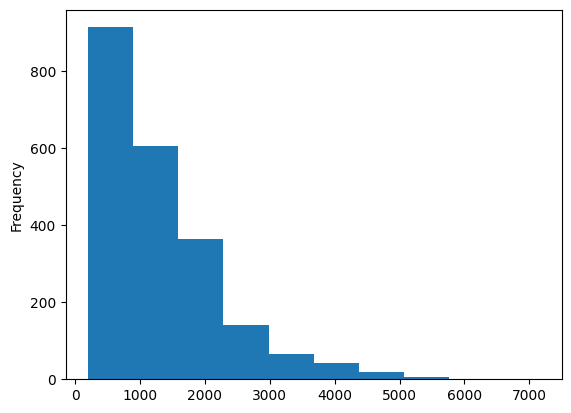

In [ ]:
# Focused EDA:
# Look at the final_price variable. Does it have a long tail? Plot the tail
df['final_price'].plot(kind='hist')

In [ ]:
# Q2. What's the median (50% percentile) for variable 'ram'?
df['ram'].median()

16.0

In [ ]:
# Prepare and split the dataset:
# Shuffle the dataset (the filtered one you created above), use seed 42
df = df.sample(frac=1, random_state=42)
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train = df.iloc[:int(len(df)*0.6)]
df_val = df.iloc[int(len(df)*0.6):int(len(df)*0.8)]
df_test = df.iloc[int(len(df)*0.8):]

In [ ]:
# Q3. Deal Missing Values & Fit Linear Regression without Regularization
def fill_miss(df, fill_mean = False, col_name = 'screen'):
  if fill_mean:
    df.loc[:, col_name] = df[col_name].fillna(df[col_name].mean())
  else:
    df.loc[:, col_name] = df[col_name].fillna(0)

  return df

def fit_reg_rmse(df_train, df_val, reg = False):
  X_train = df_train.drop('final_price', axis=1)
  y_train = df_train['final_price'].values

  if reg:
    # Code later
    rmse = 0
  else:
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(df_val.drop('final_price', axis=1))
    rmse = root_mean_squared_error(df_val['final_price'].values, y_pred)

  return np.round(rmse,3)

fit_reg_rmse(fill_miss(df_train, fill_mean = False), fill_miss(df_val, fill_mean = False))
fit_reg_rmse(fill_miss(df_train, fill_mean = True), fill_miss(df_val, fill_mean = True))

613.791

613.791

In [ ]:
# Q5. Random Seed affect on Regression Model performance:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []

for seed in seeds:
  df = df.sample(frac=1, random_state=seed)
  df_train = df.iloc[:int(len(df)*0.6)]
  df_val = df.iloc[int(len(df)*0.6):int(len(df)*0.8)]

  scores.append(fit_reg_rmse(fill_miss(df_train, fill_mean = False), fill_miss(df_val, fill_mean = False)))

scores
np.round(np.std(scores),3)

[626.108,
 622.142,
 556.79,
 596.14,
 605.773,
 567.176,
 617.027,
 613.369,
 547.645,
 642.879]

30.349

In [ ]:
# Q6. RMSE on Test with seed = 9
df = df.sample(frac=1, random_state=9)
df_train = df.iloc[:int(len(df)*0.8)]
df_test = df.iloc[int(len(df)*0.8):]

fit_reg_rmse(fill_miss(df_train, fill_mean = False), fill_miss(df_test, fill_mean = False))

608.597

# (W3) Classification

In [ ]:
# Useful snippets
#------Colab:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# ML Libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Engineering Libraries:
import requests
from zipfile import ZipFile
from io import BytesIO

In [ ]:
# Function to read a CSV present in zip file of another zip file URL:

def read_csv_from_nested_zip(url, zip_file_path, csv_file_path):
    # Download the zip file
    response = requests.get(url)
    # Extract the outer ZipFile as zip1
    zip1 = ZipFile(BytesIO(response.content))
    # zip1.namelist()
    # Extract the innter ZipFile as zip2
    zip2 = ZipFile(zip1.open(zip_file_path))
    # zip2.namelist()
    with zip2.open(csv_file_path) as csv_file:
      df = pd.read_csv(csv_file, sep=';')

    zip1.close()
    zip2.close()

    return df

# Data Extraction:
url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
zip_file_path = "bank.zip"
csv_file_path = "bank-full.csv"

df = read_csv_from_nested_zip(url, zip_file_path, csv_file_path)
# Print some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Use only these columns from df:
use_cols = ['age', 'job', 'marital', 'education', 'balance', 'housing',
            'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
            'previous', 'poutcome', 'y']

df = df[use_cols].copy()
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)

df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Q1. Mode
df["education"].value_counts()
df["education"].mode()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


,education
0,secondary


In [ ]:
# Q2. Create a correlation matrix for only the numerical features
df.corr(numeric_only = True)

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
df.shape

(45211, 15)

In [ ]:
# Q3. Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only

df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Split your data in train/val/test sets with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['y'])
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42, stratify=df_full_train['y'])

# Create/Update datasets created from Source Data
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Obtain the y for respective datasets
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y'], df_val['y'], df_test['y']

In [ ]:
# Mutual Information Score:
from sklearn.metrics import mutual_info_score

def mutual_info_y_score(series):
    return round(mutual_info_score(series, df_full_train.y), 2)

mi = df_full_train[cat_cols].apply(mutual_info_y_score)
mi.sort_values(ascending=False)


,0
poutcome,0.03
month,0.02
job,0.01
housing,0.01
contact,0.01
marital,0.00
education,0.00


In [ ]:
# Q4. One Hot encode Categorical features

X_train = pd.get_dummies(df_train, columns=cat_cols)
X_val = pd.get_dummies(df_val, columns=cat_cols)
X_test = pd.get_dummies(df_test, columns=cat_cols)

In [ ]:
# Fitting Logistic Regression Model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)
base_score = round(model.score(X_val, y_val),4)
base_score

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

0.9021

In [ ]:
# Q5. Feature Elimination
scores = []
for col in X_train.columns:
  X_train_temp = X_train.drop(col, axis=1)
  X_val_temp = X_val.drop(col, axis=1)
  _ = model.fit(X_train_temp, y_train)
  scores.append(round(model.score(X_val_temp, y_val),4))

scores = pd.Series(scores, index=X_train.columns)
base_score - scores.sort_values(ascending=False)

In [ ]:
# Q6. Regularized Logistic Regression
C = [0.01, 0.1, 1, 10, 100]
scores = []
for c in C:
  model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
  _ = model.fit(X_train, y_train)
  scores.append(round(model.score(X_val, y_val),3))

scores = pd.Series(scores, index=C)
scores.sort_values(ascending=False)

,0
1.00,0.902
10.00,0.902
100.00,0.902
0.10,0.901
0.01,0.899


# (W4) Evaluation

In [ ]:
# Useful snippets
#------Colab:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# ML Libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# Data Engineering Libraries:
import requests
from zipfile import ZipFile
from io import BytesIO

# Data Viz:
import matplotlib.pyplot as plt

In [ ]:
# Function to read a CSV present in zip file of another zip file URL:

def read_csv_from_nested_zip(url, zip_file_path, csv_file_path):
    # Download the zip file
    response = requests.get(url)
    # Extract the outer ZipFile as zip1
    zip1 = ZipFile(BytesIO(response.content))
    # zip1.namelist()
    # Extract the innter ZipFile as zip2
    zip2 = ZipFile(zip1.open(zip_file_path))
    # zip2.namelist()
    with zip2.open(csv_file_path) as csv_file:
      df = pd.read_csv(csv_file, sep=';')

    zip1.close()
    zip2.close()

    return df

# Data Extraction:
url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
zip_file_path = "bank.zip"
csv_file_path = "bank-full.csv"

df = read_csv_from_nested_zip(url, zip_file_path, csv_file_path)

# Print some info
df.info()

# Use only these columns from df:
use_cols = ['age', 'job', 'marital', 'education', 'balance', 'housing',
            'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
            'previous', 'poutcome', 'y']

df['y'] = df['y'].map({'yes': 1, 'no': 0})

df = df[use_cols].copy()
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
num_cols = list(df.dtypes[df.dtypes != 'object'].index)


# New dataframe dims:
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(45211, 15)

In [ ]:
# Glimpse at the data
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# Split the data into train/val/test : 60%/20%/20%

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.2,
                                    random_state=1)

# Create/Update datasets created from Source Data
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Obtain the y for respective datasets
y_full_train = df_full_train.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y'], df_val['y'], df_test['y']

In [ ]:
# Q1. AUC for numerical columns
df_train.corr(numeric_only = True)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.107106,-0.009366,-0.004281,0.005294,-0.022960,-0.000030,0.020460
balance,0.107106,1.000000,0.003924,0.027117,-0.017251,0.001400,0.021191,0.057132
day,-0.009366,0.003924,1.000000,-0.033890,0.165827,-0.089052,-0.052645,-0.028894
duration,-0.004281,0.027117,-0.033890,1.000000,-0.084046,-0.007160,-0.004322,0.403820
campaign,0.005294,-0.017251,0.165827,-0.084046,1.000000,-0.086981,-0.039178,-0.069882
pdays,-0.022960,0.001400,-0.089052,-0.007160,-0.086981,1.000000,0.546437,0.100534
previous,-0.000030,0.021191,-0.052645,-0.004322,-0.039178,0.546437,1.000000,0.103757
y,0.020460,0.057132,-0.028894,0.403820,-0.069882,0.100534,0.103757,1.000000


In [ ]:
# Q2. Validation AUC

# One Hot encode Categorical features
X_train = pd.get_dummies(df_train, columns=cat_cols)
X_val = pd.get_dummies(df_val, columns=cat_cols)
X_test = pd.get_dummies(df_test, columns=cat_cols)

# Train a Logistic Regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
_ = model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_val)[:, 1]

# Compute AUC
round(roc_auc_score(y_val, y_pred_proba),3)

0.899

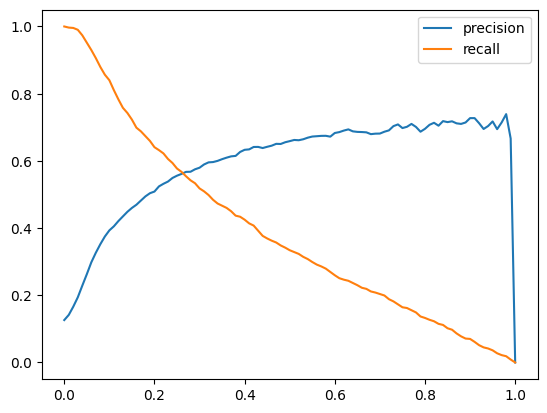

In [ ]:
# Q3. Precision and Recall for thresholds

# Calculate thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.linspace(0,1,101)

# For each threshold, compute precision and recall
precision_scores = []
recall_scores = []

for t in thresholds:
  y_pred = (y_pred_proba >= t).astype(int)
  precision_scores.append(precision_score(y_val, y_pred, zero_division=0.0))
  recall_scores.append(recall_score(y_val, y_pred))

_=plt.plot(thresholds, precision_scores, label='precision')
_=plt.plot(thresholds, recall_scores, label='recall')
_=plt.legend()
_=plt.show()

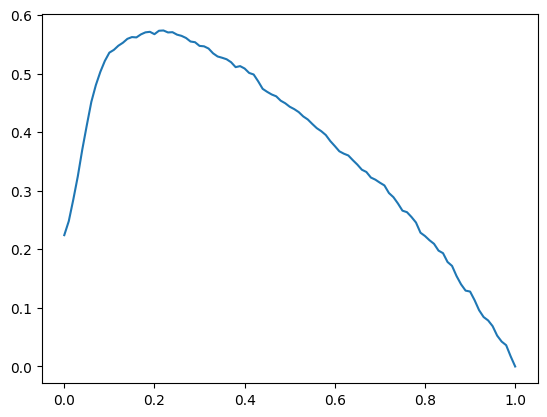

In [ ]:
# Q4: F1 score for thresholds
f1_scores = []

for t in thresholds:
  y_pred = (y_pred_proba >= t).astype(int)
  f1_scores.append(f1_score(y_val, y_pred))

_=plt.plot(thresholds, f1_scores)

In [ ]:
# Q5. Kfold AUC

# Create a StratifiedKFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the AUC scores
auc_scores = []

# Perform cross-validation
for train_idx, val_idx in kf.split(df_full_train):
  df_train = pd.get_dummies(df_full_train.drop(columns=['y']).iloc[train_idx], columns=cat_cols)
  df_val = pd.get_dummies(df_full_train.drop(columns=['y']).iloc[val_idx], columns=cat_cols)

  y_train = df_full_train.iloc[train_idx].y.values
  y_val = df_full_train.iloc[val_idx].y.values

  # Create and fit the model
  model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
  _=model.fit(df_train, y_train)
  # Predict probabilities for the val set
  y_pred_proba = model.predict_proba(df_val)[:, 1]
  # Calculate AUC score for this fold
  auc_scores.append(roc_auc_score(y_val, y_pred_proba))

# Std of Scores
np.round(np.std(auc_scores),4)

0.0065

In [ ]:
# Q6. Hyperparameter Tuning - C
from tqdm.auto import tqdm

for C in tqdm([0.000001, 0.001, 1]):
  kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

  # Initialize a list to store the AUC scores
  auc_scores = []

  # Perform cross-validation
  for train_idx, val_idx in kf.split(df_full_train):
    df_train = pd.get_dummies(df_full_train.drop(columns=['y']).iloc[train_idx], columns=cat_cols)
    df_val = pd.get_dummies(df_full_train.drop(columns=['y']).iloc[val_idx], columns=cat_cols)
    y_train = df_full_train.iloc[train_idx].y.values
    y_val = df_full_train.iloc[val_idx].y.values
    # Create and fit the model
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    _=model.fit(df_train, y_train)
    # Predict probabilities for the val set
    y_pred_proba = model.predict_proba(df_val)[:, 1]
    # Calculate AUC score for this fold
    auc_scores.append(roc_auc_score(y_val, y_pred_proba))

  print('C=%s %.3f +- %.3f' % (C, np.mean(auc_scores), np.std(auc_scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.701 +- 0.004
C=0.001 0.861 +- 0.008
C=1 0.906 +- 0.006


# (W5) Deployment

In [2]:
# Useful snippets
#------Colab:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#------Mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')

#------PWD & Py Version:
%pwd
%cd drive/My Drive/Works/X-ops/ml-ops/zCamp/HW
!python --version

Mounted at /content/drive


'/content'

/content/drive/My Drive/Works/X-ops/ml-ops/zCamp/HW
Python 3.10.12


In [3]:
# Install Pipenv to create python environment with python 3.11
!pip install pipenv -q
!pipenv --version

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 26.2 MB/s eta 0:00:00


In [10]:
# Install packages using pipenv with python 3.11
!pipenv install numpy pandas scikit-learn==1.5.2

Installing numpy...
Resolving numpy...
Added numpy to Pipfile's [packages] ...
✔ Installation Succeeded
⠙ Installing numpy...
Installing pandas...
Resolving pandas...
Added pandas to Pipfile's [packages] ...
✔ Installation Succeeded
⠙ Installing pandas...
Installing scikit-learn==1.5.2...
Resolving scikit-learn==1.5.2...
Added scikit-learn to Pipfile's [packages] ...
✔ Installation Succeeded
⠋ Installing scikit-learn...
Pipfile.lock not found, creating...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success!
⠏ Locking packages...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (02bd189a2b0c00b15e08df760394ca2d5e075997228db5554e6fa2389ae74a2e)!
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
Installing dependencies from Pipfile.lock (e74a2e)...


# SPARK

In [ ]:
#install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#create java home variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
#download SPARK (NEW DOWNLOAD LINK)
!wget -q http://apache.osuosl.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [ ]:
#extract the spark file to the current folder
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [ ]:
#create spark home variable
import os
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
#install findspark
#findspark searches pyspark installation on the server
#and adds PySpark installation path to sys.path at runtime
#so that PySpark modules can be imported

!pip install -q findspark

In [ ]:
#import findspark
import findspark
findspark.init()

In [ ]:
#import pyspark (added by findspark during runtime)
import pyspark

In [ ]:
#import sparksession
from pyspark.sql import SparkSession

In [ ]:
#create sparksession object and provide appName
spark=SparkSession.builder.appName("local[*]").getOrCreate()

In [ ]:
#print spark version
print("Apache Spark version: ", spark.version)

Apache Spark version:  3.3.1


In [ ]:
#create sample data for spark
data = [("James","","Smith",30,"M",60000),
        ("Michael","Rose","",50,"M",70000),
        ("Robert","","Williams",42,"",400000),
        ("Maria","Anne","Jones",38,"F",500000),
        ("Jen","Mary","Brown",45,"F",0)]

columns = ["first_name","middle_name","last_name","Age","gender","salary"]
pysparkDF = spark.createDataFrame(data = data, schema = columns)
pysparkDF.printSchema()
pysparkDF.show(truncate=False)

root
 |-- first_name: string (nullable = true)
 |-- middle_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+----------+-----------+---------+---+------+------+
|first_name|middle_name|last_name|Age|gender|salary|
+----------+-----------+---------+---+------+------+
|James     |           |Smith    |30 |M     |60000 |
|Michael   |Rose       |         |50 |M     |70000 |
|Robert    |           |Williams |42 |      |400000|
|Maria     |Anne       |Jones    |38 |F     |500000|
|Jen       |Mary       |Brown    |45 |F     |0     |
+----------+-----------+---------+---+------+------+



In [ ]:
from pyspark.sql.functions import mean, col, max
#Example 1
df2=pysparkDF.select(mean("age"),mean("salary")).show()
#Example 2
pysparkDF.groupBy("gender") \
         .agg(mean("age"),mean("salary"),max("salary")) \
         .show()

+--------+-----------+
|avg(age)|avg(salary)|
+--------+-----------+
|    41.0|   206000.0|
+--------+-----------+

+------+--------+-----------+-----------+
|gender|avg(age)|avg(salary)|max(salary)|
+------+--------+-----------+-----------+
|     M|    40.0|    65000.0|      70000|
|     F|    41.5|   250000.0|     500000|
|      |    42.0|   400000.0|     400000|
+------+--------+-----------+-----------+

